# Short look at the embeddings

In this notebook, I just want to look in 2D and 3D at the embeddings of the dataset, to see what I am dealing with.

The coding is not very nice in this notebook, but I just want to see if I could notice some obvious clusters.

In [18]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
from typing import List
from ast import literal_eval
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [36]:
def get_embedding_array(values: List[str]):
    """Converts a string with embeddings into a list of floats"""
    result = []
    for value in values:
        tokens = value.split(' ')
        result.append(list(map(lambda x: float(x), tokens)))
    
    return np.array(result)

In [37]:
dataset = pd.read_csv("/Users/yone/Documents/python_playground/ActionableReviews/data/embedded_reviews_duolingo_1star.csv")
embeddings = get_embedding_array(dataset["embedding"].to_list())
pca = PCA(2)
pca.fit(embeddings)
embeddings_pca = pca.transform(embeddings)

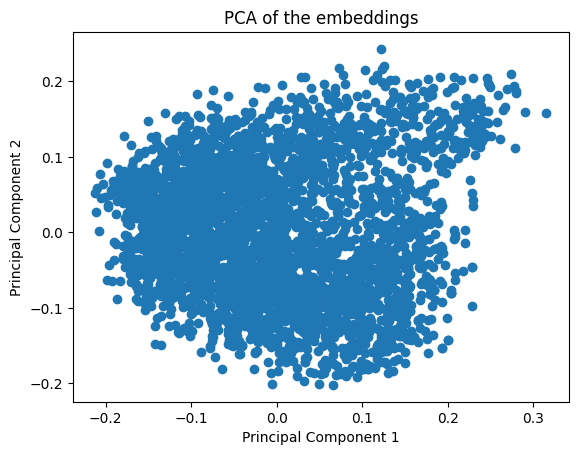

In [38]:
plt.scatter(embeddings_pca[:, 0], embeddings_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of the embeddings')
plt.show()

In [27]:
pca_3d = PCA(3)
embeddings_pca_3d = pca_3d.fit_transform(embeddings)

In [28]:
fig = px.scatter_3d(
    embeddings_pca_3d,
    x=0,  
    y=1,  
    z=2, 
    title="PCA Visualization in 3D",
)
fig.show()

PCA doesn't tell me much, but I am not that surprised.

In [29]:
tsne = TSNE(n_components=2) 
X_tsne = tsne.fit_transform(embeddings)

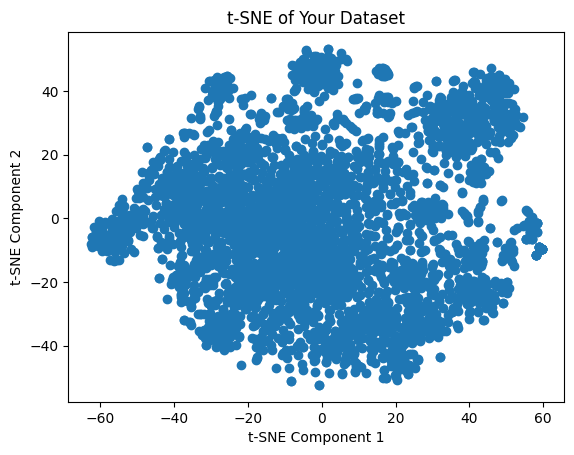

In [30]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE of Your Dataset')
plt.show()

2D TSNE highlights a big cluster, and a few smaller ones. Just looking at this, it feels like there are a couple of common "themes" that could be analysed. 

In [31]:
tsne_3d = TSNE(n_components=3) 
X_tsne_3d = tsne_3d.fit_transform(embeddings)

In [32]:
fig = px.scatter_3d(
    X_tsne_3d,
    x=0,  
    y=1,  
    z=2, 
    title="TSNE Visualization in 3D",
)
fig.show()

The 3D projection doesn't tell me much. At least I tried.

# After Clustering Visualisation

In [46]:
dataset = pd.read_csv("/Users/yone/Documents/python_playground/ActionableReviews/data/labeled_embeddings_duolingo_1star_40_cls.csv")
embeddings = get_embedding_array(dataset["embedding"].to_list())
labels = dataset["label"].to_list()

In [47]:
tsne = TSNE(n_components=2) 
X_tsne = tsne.fit_transform(embeddings)

/var/folders/gz/4fgswjlj12v8my8_r3bznzx00000gn/T/ipykernel_7875/923917859.py:1: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



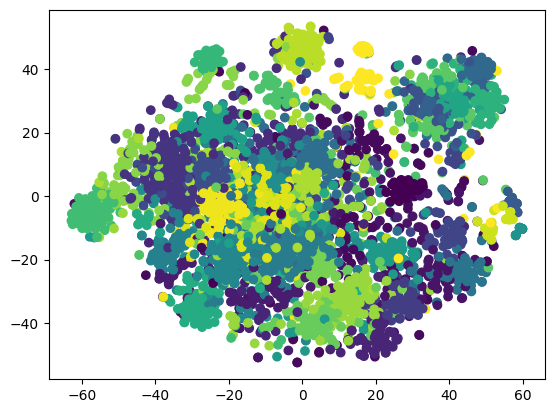

In [48]:
colormap = plt.cm.get_cmap('viridis', max(labels) + 1)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap=colormap)


In [53]:
dataset[["label", "reviewId"]].groupby("label").count()

,reviewId
label,
0,58
1,113
2,114
3,87
4,87
5,95
6,184
7,75
8,79
